In [1]:
%matplotlib inline
# Imports

import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

from yolo.distance_measure.camera_data import CameraData
from yolo.distance_measure.ipm_distance_calculator import IPMDistanceCalculator
from yolo.yolo import YoloClassifier
from yolo.yolo_config import YoloV3Config, YoloV4Config, YoloV5Config


np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)


/home/gguy/.virtualenvs/darknet_integration/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
yolov3 = YoloV3Config(
    conf_threshold=0.4,
    nms_threshold=0.3,
    cfg_file="/home/gguy/code/tcc/darknet_integration/models/yolov3.cfg",
    weights_file="/home/gguy/code/tcc/darknet_integration/models/yolov3.weights",
    classes_file="/home/gguy/code/tcc/darknet_integration/models/coco.names"
)
yolov4 = YoloV4Config(
    conf_threshold=0.4,
    nms_threshold=0.3,
    cfg_file="/home/gguy/code/tcc/darknet_integration/models/yolov4.cfg",
    weights_file="/home/gguy/code/tcc/darknet_integration/models/yolov4.weights",
    classes_file="/home/gguy/code/tcc/darknet_integration/models/coco.names"
)
yolov5 = YoloV5Config(
    conf_threshold=0.4,
    nms_threshold=0.3,
    classes_file="/home/gguy/code/tcc/darknet_integration/models/coco.names"
)


def collect(cd, dataset, dist, yolo, extra=False, show_progress=True):

    ipm = IPMDistanceCalculator(cd)

    #print(f"Results for {dataset} @ {dist}m:")

    imgs = [
        cv2.imread(f"/home/gguy/code/tcc/darknet_integration/test_data/{dataset}/{dist}m_0.png"),
        cv2.imread(f"/home/gguy/code/tcc/darknet_integration/test_data/{dataset}/{dist}m_1.png")
    ]
    imgs[0].shape

    if extra:
        projected_img = ipm.project(imgs[0])
        plt.imshow( cv2.cvtColor(projected_img, cv2.COLOR_BGR2RGB))

    imgs_copy = [img.copy() for img in imgs]
    yolo_images, detections = yolo.classify(imgs_copy, ipm)

    dets = [d for d in detections[0] if d.similar_detection is not None]
    dets = sorted(dets, key=lambda x: x.x1)

    return_data = []
    if len(dets) > 0:
        for i, d in enumerate(dets):
            ipm_str = str(d.ipm_distance).replace('.', ',')
            stereo_str = str(d.stereo_distance).replace('.', ',').replace('-inf', '0')
            adv_stereo_str = str(d.adv_stereo_distance).replace('.', ',').replace('-inf', '0')
            if show_progress:
                print(f"{dist}m \t{ipm_str} \t{stereo_str} \t{adv_stereo_str}")
            return_data = [dist, float(ipm_str.replace(',', '.')), float(stereo_str.replace(',', '.')), float(adv_stereo_str.replace(',', '.'))]
            break
    else:
        if show_progress:
            print(f"{dist}m \t0 \t0 \t0")
        return_data = [dist, 0, 0, 0]

    if extra:
        # result 1
        print("Det1:")
        yolo_result = cv2.cvtColor(yolo_images[0], cv2.COLOR_BGR2RGB)
        for det in sorted(detections[0], key=lambda x: x.x1):
            print(f"Detection(\n\tx1={det.x1}, y1={det.y1}, x2={det.x2}, y2={det.y2}, width={det.width}, height={det.height}, \n\tconfidence={det.confidence}, class_index={det.class_index},\n\t distance_pivot={det.distance_pivot}, \n\tipm_distance={det.ipm_distance}, ipm_x={det.ipm_x}, ipm_y={det.ipm_y}, \n\tstereo_distance={det.stereo_distance}, \n\tadv_stereo_distance={det.adv_stereo_distance}, \n\tsimilar_detection={det.similar_detection is not None})")

        plt.figure(figsize=(20,10))
        plt.imshow(yolo_result)

        # result 2
        print("Det2:")
        yolo_result = cv2.cvtColor(yolo_images[1], cv2.COLOR_BGR2RGB)
        for det in sorted(detections[1], key=lambda x: x.x1):
            print(f"Detection(\n\tx1={det.x1}, y1={det.y1}, x2={det.x2}, y2={det.y2}, width={det.width}, height={det.height}, \n\tconfidence={det.confidence}, class_index={det.class_index},\n\t distance_pivot={det.distance_pivot}, \n\tipm_distance={det.ipm_distance}, ipm_x={det.ipm_x}, ipm_y={det.ipm_y}, \n\tstereo_distance={det.stereo_distance}, \n\tadv_stereo_distance={det.adv_stereo_distance}, \n\tsimilar_detection={det.similar_detection is not None})")

        plt.figure(figsize=(20,10))
        plt.imshow(yolo_result)

    return return_data

In [3]:
cd = CameraData(
            translation=(0, 0, 1.55),
            rotation=(0.0, 0.0, 0.0),
            focus_length=CameraData.focus_from_hfov(72.0, 1280),
            image_width=1280,
            image_height=720,
            skew=0,
            camera_distance=(0, 0.6, 0),
        )

yolo = YoloClassifier(yolov4)

DATASET = 'day_72hfov_largeB'

3m 	3,823 	3,696 	4,267
4m 	4,589 	4,783 	5,525
5m 	5,537 	5,84 	6,749
6m 	6,476 	6,733 	7,782
7m 	7,344 	8,525 	9,854
8m 	8,084 	9,355 	10,814
9m 	8,983 	10,263 	11,865
10m 	10,194 	10,677 	12,344
11m 	10,923 	12,291 	14,211
12m 	11,773 	12,584 	14,549
13m 	12,303 	13,381 	15,47
14m 	13,792 	15,32 	17,713
15m 	14,372 	15,777 	18,242
16m 	15,002 	17,329 	20,036
17m 	15,692 	17,329 	20,036
18m 	17,072 	19,575 	22,634
19m 	17,971 	20,328 	23,505
20m 	18,962 	19,945 	23,061
21m 	19,511 	22,022 	25,464
22m 	21,011 	22,491 	26,005
23m 	22,021 	25,168 	29,102
24m 	22,381 	25,782 	29,811
25m 	23,541 	25,168 	29,101


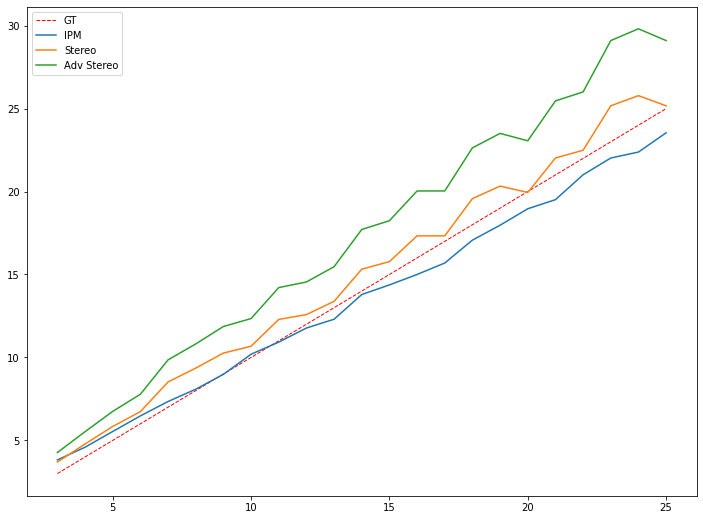

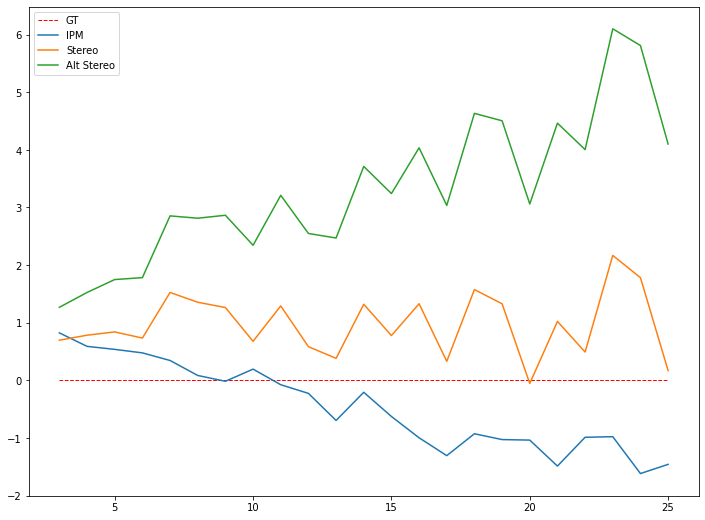

In [4]:
################################
#collect(cd, DATASET, 14, yolo, extra=True, show_progress=True)
data = [collect(cd, DATASET, i, yolo) for i in range(3,26)]
################################

data = np.array(data)
data = np.transpose(data)

plt_size = (12,9)

plt.figure(figsize=plt_size)
#plt.xticks(data[0])
plt.plot(data[0],data[0], label='GT', color='red', linewidth=1.0, linestyle='--')
plt.plot(data[0],data[1], label='IPM')
plt.plot(data[0],data[2], label='Stereo')
plt.plot(data[0],data[3], label='Adv Stereo')


plt.legend()
plt.show()

plt.figure(figsize=plt_size)
#plt.xticks(data[0])
plt.plot(data[0],data[0] - data[0], label='GT', color='red', linewidth=1.0, linestyle='--')
plt.plot(data[0],data[1] - data[0], label='IPM')
plt.plot(data[0],data[2] - data[0], label='Stereo')
plt.plot(data[0],data[3] - data[0], label='Alt Stereo')


plt.legend()
plt.show()


In [5]:
local_dataset = DATASET.replace('day_', '').replace('night_', '')
################################
# DAY
# V3
print("DAY V3")
yolo = YoloClassifier(yolov3)
day_v3_data = [collect(cd, f'day_{local_dataset}', i, yolo, show_progress=False) for i in range(3,26)]
day_v3_data = np.array(day_v3_data)
day_v3_data = np.transpose(day_v3_data)

# V3
print("DAY V4")
yolo = YoloClassifier(yolov4)
day_v4_data = [collect(cd, f'day_{local_dataset}', i, yolo, show_progress=False) for i in range(3,26)]
day_v4_data = np.array(day_v4_data)
day_v4_data = np.transpose(day_v4_data)

# NIGHT
# V3
print("NIGHT V3")
yolo = YoloClassifier(yolov3)
night_v3_data = [collect(cd, f'night_{local_dataset}', i, yolo, show_progress=False) for i in range(3,26)]
night_v3_data = np.array(night_v3_data)
night_v3_data = np.transpose(night_v3_data)

# V4
print("NIGHT V4")
yolo = YoloClassifier(yolov4)
night_v4_data = [collect(cd, f'night_{local_dataset}', i, yolo, show_progress=False) for i in range(3,26)]
night_v4_data = np.array(night_v4_data)
night_v4_data = np.transpose(night_v4_data)

################################


gt_data = day_v3_data[0]
ipm_data = [day_v3_data[1], day_v4_data[1], night_v3_data[1], night_v4_data[1]]
stereo_data = [day_v3_data[2], day_v4_data[2], night_v3_data[2], night_v4_data[2]]
adv_stereo_data = [day_v3_data[3], day_v4_data[3], night_v3_data[3], night_v4_data[3]]



DAY V3
DAY V4
NIGHT V3
NIGHT V4


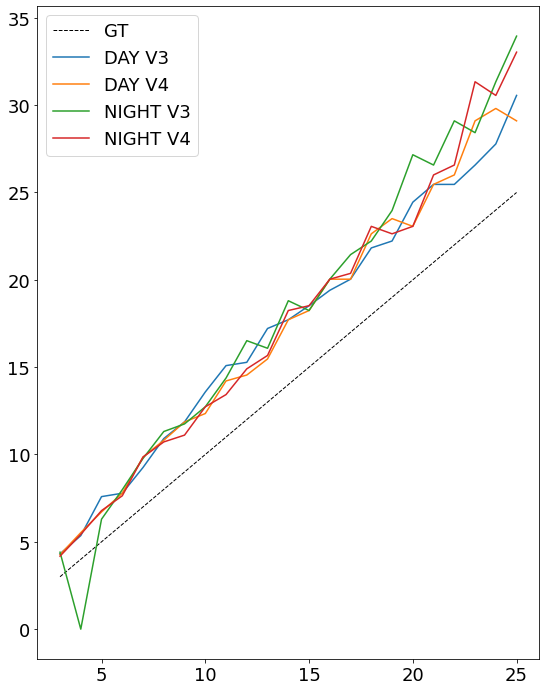

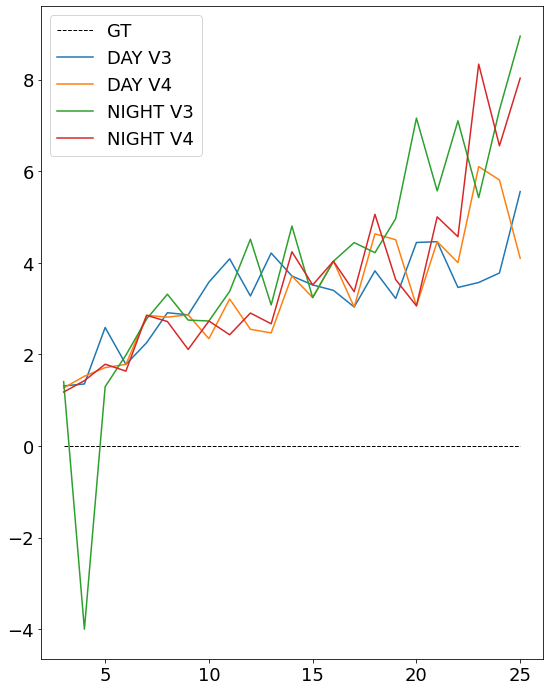

3m 		4,312 		4,267 		4,406 		4,179
4m 		5,355 		5,525 		0,0 		5,427
5m 		7,588 		6,712 		6,296 		6,786
6m 		7,782 		7,782 		7,985 		7,636
7m 		9,257 		9,854 		9,775 		9,854
8m 		10,911 		10,814 		11,315 		10,719
9m 		11,865 		11,865 		11,75 		11,109
10m 		13,579 		12,344 		12,73 		12,73
11m 		15,088 		14,211 		14,378 		13,43
12m 		15,277 		14,549 		16,516 		14,904
13m 		17,214 		15,47 		16,081 		15,669
14m 		17,713 		17,713 		18,803 		18,242
15m 		18,518 		18,242 		18,242 		18,518
16m 		19,4 		20,036 		20,036 		20,036
17m 		20,036 		20,036 		21,443 		20,37
18m 		21,826 		22,634 		22,222 		23,061
19m 		22,222 		23,505 		23,966 		22,634
20m 		24,445 		23,061 		27,161 		23,061
21m 		25,463 		25,464 		26,571 		26,005
22m 		25,463 		26,005 		29,102 		26,571
23m 		26,571 		29,102 		28,425 		31,34
24m 		27,779 		29,811 		31,34 		30,557
25m 		30,557 		29,101 		33,952 		33,034
RMSE:
3.456 	3.535 	4.695 	4.104


In [12]:

draw_data = ipm_data

plt_size = (9,12)

plt.figure(figsize=plt_size)
#plt.xticks(data[0])
plt.plot(gt_data, gt_data, label='GT', color='black', linewidth=1.0, linestyle='--')
plt.plot(gt_data, draw_data[0], label='DAY V3')
plt.plot(gt_data, draw_data[1], label='DAY V4')
plt.plot(gt_data, draw_data[2], label='NIGHT V3')
plt.plot(gt_data, draw_data[3], label='NIGHT V4')


plt.rcParams.update({'font.size': 18})
plt.legend()
plt.show()

plt.figure(figsize=plt_size)
#plt.xticks(data[0])
plt.plot(gt_data,gt_data - gt_data, label='GT', color='black', linewidth=1.0, linestyle='--')
plt.plot(gt_data,draw_data[0] - gt_data, label='DAY V3')
plt.plot(gt_data,draw_data[1] - gt_data, label='DAY V4')
plt.plot(gt_data,draw_data[2] - gt_data, label='NIGHT V3')
plt.plot(gt_data,draw_data[3] - gt_data, label='NIGHT V4')

plt.rcParams.update({'font.size': 18})
plt.legend()
plt.show()


for i, d in enumerate(np.transpose(np.array(draw_data))):
    d0 = str(d[0]).replace('.', ',').replace('-inf', '0')
    d1 = str(d[1]).replace('.', ',').replace('-inf', '0')
    d2  = str(d[2]).replace('.', ',').replace('-inf', '0')
    d3 = str(d[3]).replace('.', ',').replace('-inf', '0')
    print(f"{int(gt_data[i])}m \t\t{d0} \t\t{d1} \t\t{d2} \t\t{d3}")

def rmse(gt, pred):
    return round(np.sqrt(np.mean((gt - pred)**2)), 3)

print("RMSE:")
print(f"{rmse(gt_data, draw_data[0])} \t{rmse(gt_data, draw_data[1])} \t{rmse(gt_data, draw_data[2])} \t{rmse(gt_data, draw_data[3])}")

In [13]:
# LATEX


for i, d in enumerate(np.transpose(np.array(draw_data))):
    gt = int(gt_data[i])
    d0 = str(d[0]).replace('.', ',').replace('-inf', '0')
    d1 = str(d[1]).replace('.', ',').replace('-inf', '0')
    d2  = str(d[2]).replace('.', ',').replace('-inf', '0')
    d3 = str(d[3]).replace('.', ',').replace('-inf', '0')
    print("\\midrule")
    result_str = f"\\textit{{{gt}}}"

    min_diff = min([abs(gt - x) for x in d])
    if min_diff == abs(gt - d[0]):
        d0 = f"\\textbf{{{d0}}}"

    if min_diff == abs(gt - d[1]):
        d1 = f"\\textbf{{{d1}}}"

    if min_diff == abs(gt - d[2]):
        d2 = f"\\textbf{{{d2}}}"

    if min_diff == abs(gt - d[3]):
        d3 = f"\\textbf{{{d3}}}"


    print(f"\\textit{{{gt}}} & {d0} & {d1} & {d2} & {d3} \\\\")

#\textit{23} & 55,936 & 37,291 & 0 & \textbf{13,984} \\

\midrule
\textit{3} & 4,312 & 4,267 & 4,406 & \textbf{4,179} \\
\midrule
\textit{4} & \textbf{5,355} & 5,525 & 0,0 & 5,427 \\
\midrule
\textit{5} & 7,588 & 6,712 & \textbf{6,296} & 6,786 \\
\midrule
\textit{6} & 7,782 & 7,782 & 7,985 & \textbf{7,636} \\
\midrule
\textit{7} & \textbf{9,257} & 9,854 & 9,775 & 9,854 \\
\midrule
\textit{8} & 10,911 & 10,814 & 11,315 & \textbf{10,719} \\
\midrule
\textit{9} & 11,865 & 11,865 & 11,75 & \textbf{11,109} \\
\midrule
\textit{10} & 13,579 & \textbf{12,344} & 12,73 & 12,73 \\
\midrule
\textit{11} & 15,088 & 14,211 & 14,378 & \textbf{13,43} \\
\midrule
\textit{12} & 15,277 & \textbf{14,549} & 16,516 & 14,904 \\
\midrule
\textit{13} & 17,214 & \textbf{15,47} & 16,081 & 15,669 \\
\midrule
\textit{14} & \textbf{17,713} & \textbf{17,713} & 18,803 & 18,242 \\
\midrule
\textit{15} & 18,518 & \textbf{18,242} & \textbf{18,242} & 18,518 \\
\midrule
\textit{16} & \textbf{19,4} & 20,036 & 20,036 & 20,036 \\
\midrule
\textit{17} & \textbf{20,036} & \textbf{20,